In [1]:
%matplotlib notebook
DEFAULT_FIGSIZE = (12, 8)

import os
import pickle
import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon': True})
import pandas as pd

sys.path.append('..')
from antlia.record import Record, load_file
from antlia.dtype import load_converted_record
from antlia import plot_braking as braking
from antlia import dtc
from antlia.plotdf import plotjoint

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE
mpl.rcParams['legend.facecolor'] = 'white'

colors = sns.color_palette('Paired', 10)

In [2]:
import IPython.display

def display_animation(animation):
    plt.close(animation._fig)
    return IPython.display.HTML(animation.to_jshtml())

In [6]:
bicycle_record_files = [
    '2018-04-23_12-30-38.csv',
    '2018-04-23_13-13-36.csv',
    '2018-04-23_14-22-58.csv',
    '2018-04-23_15-27-48.csv',
    '2018-04-23_16-32-27.csv',
    '2018-04-23_17-14-00.csv',
    '2018-04-25_09-27-24.csv',
    '2018-04-25_10-20-28.csv',
    '2018-04-25_11-34-04.csv',
    '2018-04-25_12-41-48.csv',
    '2018-04-25_14-14-57.csv',
    '2018-04-25_14-49-39.csv',
    '2018-04-25_16-15-57.csv',
    '2018-04-25_17-23-04.csv',
    '2018-04-26_11-19-31.csv',
    '2018-04-26_14-50-53.csv',
    '2018-04-27_14-59-52.csv'
]

lidar_record_files = [
    '2018-04-23-12-17-37_0.pkl.gz',
    '2018-04-23-13-01-00_0.pkl.gz',
    '2018-04-23-14-10-33_0.pkl.gz',
    '2018-04-23-15-15-14_0.pkl.gz',
    '2018-04-23-16-19-35_0.pkl.gz',
    '2018-04-23-17-01-24_0.pkl.gz',
    '2018-04-25-09-15-00_0.pkl.gz',
    '2018-04-25-10-07-31_0.pkl.gz',
    '2018-04-25-11-21-29_0.pkl.gz',
    '2018-04-25-12-29-06_0.pkl.gz',
    '2018-04-25-14-02-15_0.pkl.gz',
    '2018-04-25-14-36-55_0.pkl.gz',
    '2018-04-25-16-03-24_0.pkl.gz',
    '2018-04-25-17-10-07_0.pkl.gz',
    '2018-04-26-11-07-38_0.pkl.gz',
    '2018-04-26-14-38-03_0.pkl.gz',
    '2018-04-27-14-47-07_0.pkl.gz',
    '2018-04-27-15-39-56_0.pkl.gz'
]

i = 3 # rider
f1 = bicycle_record_files[i]
f2 = lidar_record_files[i]

with open('../config.p', 'rb') as f:
        bicycle_calibration = pickle.load(f)

data_dir = '../../data/comfort/'
bicycle_rec = load_file(
    os.path.join(data_dir, f1),
    bicycle_calibration['convbike'])
lidar_rec = load_converted_record(
    os.path.join(data_dir, f2))

r = Record(lidar_rec, bicycle_rec)
r.sync()

-9.2400000000000091

In [7]:
r._calculate_trials2()

<IPython.core.display.Javascript object>


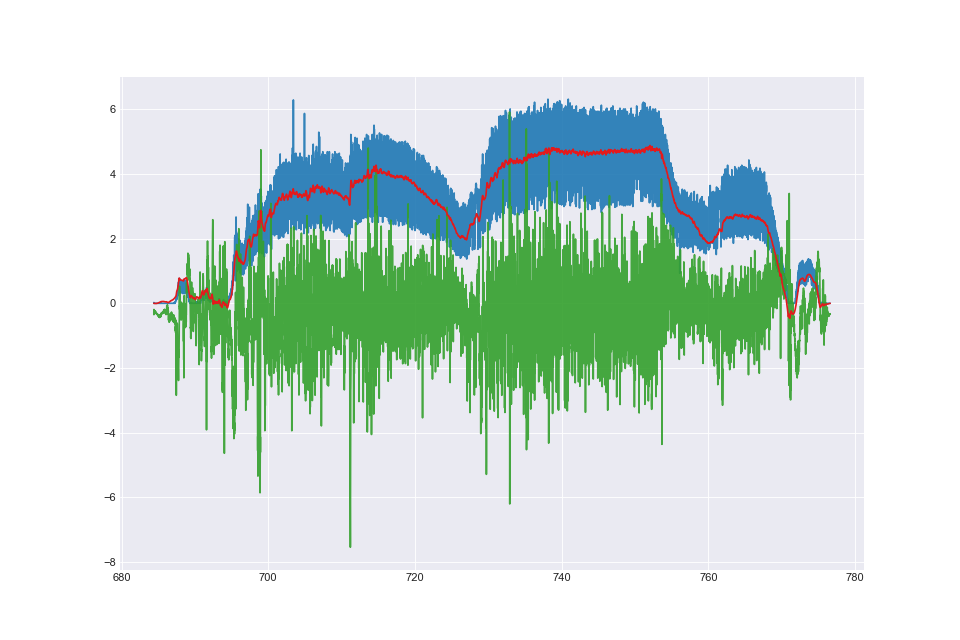

In [8]:
%matplotlib notebook

import scipy.integrate


def estimate_velocity(trial):
    x = trial.bicycle['accelerometer x']
    xm = x[:100].mean()
    v = scipy.integrate.cumtrapz(-(x - xm), dx=trial.period, initial=0)
    error = np.interp(trial.bicycle.time, trial.bicycle.time[[0, -1]], [0, v[-1]])
    return v - error

plt.close('all')
tr = r.trials[7]
color = sns.color_palette('Paired', 12)

fig, ax = plt.subplots()
ax.plot(tr.bicycle.time,
        tr.bicycle.speed,
        alpha=0.9,
        color=color[1])
ax.plot(tr.bicycle.time,
        tr.bicycle['accelerometer x'],
        alpha=0.9,
        color=color[3])
ax.plot(tr.bicycle.time,
        estimate_velocity(tr),
        alpha=1,
        color=color[5])
plt.show()

<IPython.core.display.Javascript object>


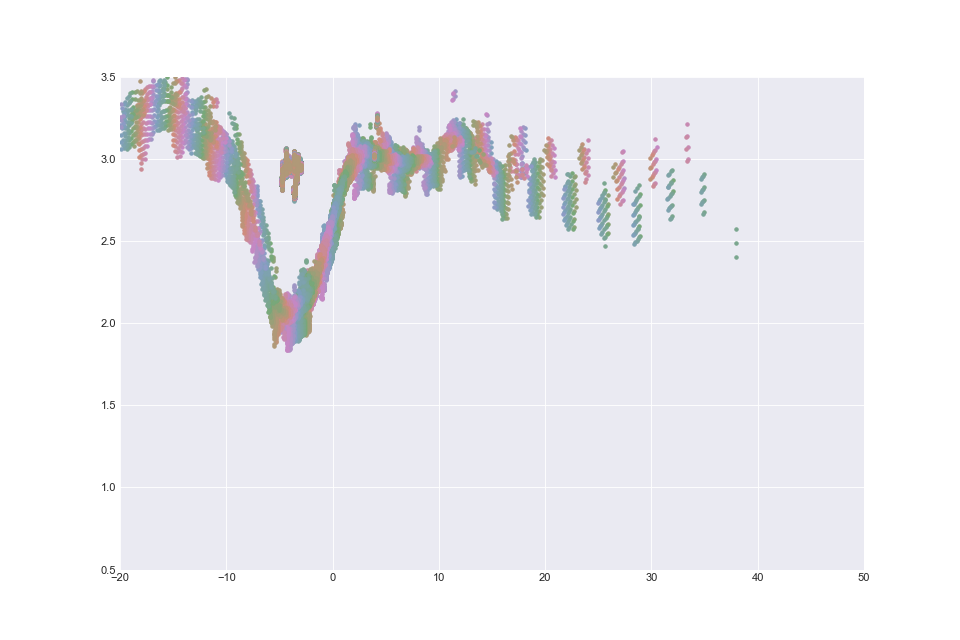

(2204, 1521)


In [9]:
color = sns.husl_palette(20, s=0.4)
plt.close('all')
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
cart_kw = {'xlim': (-20, 50), 'ylim': (0.5, 3.5)}
#x, y = [z.compressed() for z in r.trials[2].lidar.cartesian(**cart_kw)]
#ax.scatter(x, y, marker='.', color=color[0])

x, y = r.trials[2].lidar.cartesian(**cart_kw)
print(x.shape)
for i in range(x.shape[0]):
    c = color[i % len(color)]
    ax.scatter(x[i].compressed(),
               y[i].compressed(),
               marker='.',
               color=c)
    

#x, y = [z.compressed() for z in r.trials[2].event.lidar.cartesian(**cart_kw)]
#ax.scatter(x, y, marker='.', color=color[2])

ax.set_xlim(cart_kw['xlim'])
ax.set_ylim(cart_kw['ylim'])
plt.show()